In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Exercici 1
#primero cargo la base de datos y nombro las columnas con base en un archivo descriptivo que me dieron para entender que estoy haciendo... 

# Carga de datos
datos = pd.read_csv('housing data.csv')

# Nombres de las columnas
nombres_columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Asignación de nuevos nombres de columnas
datos.columns = nombres_columnas

#ver el archivo 
print (datos[:20])

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
1   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
2   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
3   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
4   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
5   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
6   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
7   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
8   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
9   0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
10  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
11  0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311.0   
12  0.62976   0.0   8.14 

In [7]:
train_data, test_data = train_test_split(datos, test_size=0.2)

In [8]:
#Exercici 1 Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

# Seleccionar todas las columnas numéricas del dataset excepto la variable objetivo 'MEDV'
X_train = train_data.drop(['MEDV'], axis=1)

# Crear un objeto de regresión lineal
reg_model = LinearRegression()

# Entrenar el modelo de regresión lineal
reg_model.fit(X_train, train_data['MEDV'])

LinearRegression()

R-squared: 0.77
Mean squared error: 17.50
[25.01501255 23.93244603 20.63397966 15.21851127 18.38790762 21.19996822
 21.14216881 24.804538    6.0787258  11.58371766 21.43686634 12.93779008
 39.70185293 17.05488313 31.47631586 24.77068474 23.72588428 37.98163222
 17.77887188 13.21187    20.44008588 22.48913089 16.49009796 26.97882419
 38.82186434 22.12784403 21.12343036 19.88230955  8.95496992 32.39537714
  9.16387934 25.63464618 19.61751396 24.41715748 31.85064416 25.59734156
 25.38814515 35.91568452 29.82220548 28.75993637 19.31328681 29.78742206
 18.6084372  20.09248864 31.30862182 30.33336925 21.45134151 31.41572095
 15.9466806  17.66051023 20.64441648 18.14558854 35.76325628 32.7311727
 20.41896646 16.40839242 22.68738121 24.96938777 24.77862327 26.934259
 23.33682358 37.12252917 30.59111417 16.64076366 21.91200892 17.68436671
 16.97048728 28.71945659 19.0262298  14.63741444 24.30669874 21.20230738
 23.71878319 18.03759536 17.5569306  14.12351006 23.86291331 20.04406194
 16.14402054

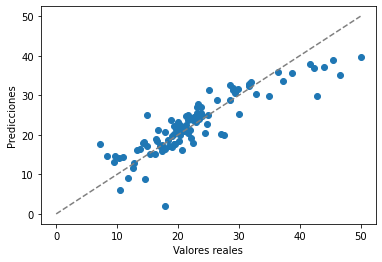

In [36]:
#Exercici 1 Crea almenys dos models de regressió diferents (regresion lineal)
#explicación resultado: un valor de R-cuadrado de 0.75 indica que el modelo es capaz de explicar el 75% de la varianza en el precio de la vivienda utilizando las variables independientes incluidas en el modelo.
#Un MSE bajo indica que el modelo es capaz de hacer predicciones precisas. En este caso, un MSE de 18.53 indica que las predicciones del modelo tienen un error promedio de raíz cuadrada de 18.53 unidades en la escala de precios de la vivienda.
#No hay un valor de MSE específico que se considere "bajo" ya que esto depende del contexto del problema y de la escala de los datos.

#from sklearn.linear_model import LinearRegression

# Seleccionar todas las columnas numéricas del conjunto de prueba excepto la variable objetivo 'MEDV'
X_test = test_data.drop(['MEDV'], axis=1)

# Utilizar el modelo de regresión lineal entrenado para hacer predicciones en el conjunto de prueba
y_pred = reg_model.predict(X_test)

# Comparar las predicciones con los valores reales del conjunto de prueba para evaluar la calidad del modelo
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(test_data['MEDV'], y_pred)
mse = mean_squared_error(test_data['MEDV'], y_pred)

print('R-squared: {:.2f}'.format(r2))
print('Mean squared error: {:.2f}'.format(mse))

# Realizar predicciones sobre los datos de entrada
y_pred = reg_model.predict(X_test)

# Mostrar las predicciones
print(y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los valores reales vs las predicciones
ax.scatter(test_data['MEDV'], y_pred)

# Agregar una línea de identidad
ax.plot([0, 50], [0, 50], '--', color='gray')

# Establecer etiquetas de los ejes
ax.set_xlabel('Valores reales')
ax.set_ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Mean squared error: 14.95
R-squared: 0.82


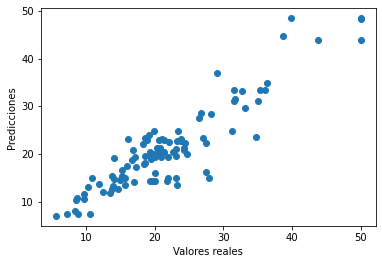

Predicciones:  [22.6 44.  12.6 33.2 12.1 21.1 23.1  7.  23.3 14.2 10.8 19.4 19.4 28.7
 19.6 37.  12.7 44.  14.9 20.  14.4  7.4 23.  18.9 19.3 10.4 16.6 13.3
 44.8 33.4 10.5 19.6 20.5 22.9 22.4 20.8 22.8 14.8 21.1 34.9 23.1 18.8
 17.3 48.3 21.2 23.6  8.1 23.4 11.8 20.4 15.  24.  14.4 15.4 18.  19.9
 19.3 20.5 15.  48.5 21.2 31.1 13.5 19.1 33.4 20.9 22.9 16.3 11.7 16.1
 13.4 19.3 24.8 19.5 22.8 31.6 13.8 27.5 22.  14.4 29.6 24.8 22.3 13.1
 18.2 24.8 15.  21.2 23.1 33.4  7.4 15.  28.5 15.4 48.5  7.5 31.1 14.5
 17.5 14.4 20.1]
Valores reales:  90     22.0
97     43.8
477    14.6
340    32.7
395    12.5
       ... 
56     31.6
445    14.9
60     16.0
495    19.7
107    19.8
Name: MEDV, Length: 101, dtype: float64


In [37]:
#Exercici 1 Crea almenys dos models de regressió diferents (arbol)
#from sklearn.tree import DecisionTreeRegressor

# Seleccionar todas las columnas del dataset excepto la variable objetivo 'MEDV'
X_train = train_data.drop(['MEDV'], axis=1)

# Crear un objeto de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=0)

# Entrenar el modelo de árbol de decisión
tree_model.fit(X_train, train_data['MEDV'])

#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos.drop('MEDV', axis=1), datos['MEDV'], test_size=0.2, random_state=0)

# Crear un objeto DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=0)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones sobre los datos de validación
y_pred = tree_model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("R-squared: {:.2f}".format(r2))

plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

print("Predicciones: ", y_pred)
print("Valores reales: ", y_test)

In [ ]:
#exercici2: En el primer modelo, el valor de R-squared es 0.75, lo que significa que el modelo explica el 75% de la varianza de los datos de entrada. El valor de MSE es 18.53, lo que indica que las predicciones del modelo están a una distancia promedio de 18.53 unidades de la variable objetivo (MEDV) de los valores reales. 
#En el segundo modelo, el valor de R-squared es 0.82, lo que indica que el modelo explica el 82% de la varianza de los datos de entrada. El valor de MSE es 14.95, lo que significa que las predicciones del modelo están a una distancia promedio de 14.95 unidades de la variable objetivo (MEDV) de los valores reales.
#En resumen, el segundo modelo muestra un mejor rendimiento que el primer modelo en términos de ambos métricas de evaluación.

In [24]:
#exercici 3. Entrena’ls utilitzant els diferents paràmetres que admeten de archivo de housing, per intentar millorar-ne la predicció.
#En Machine Learning, los hiperparámetros son parámetros externos al modelo que se ajustan antes de iniciar el proceso de entrenamiento y que controlan cómo se lleva a cabo el entrenamiento del modelo. En otras palabras, son valores que se ajustan para optimizar el rendimiento de un modelo de aprendizaje automático.
#En general, el ajuste de los hiperparámetros es un proceso iterativo que implica probar diferentes valores de los hiperparámetros para encontrar aquellos que optimizan el rendimiento del modelo en el conjunto de datos de entrenamiento y validación. 

# Seleccionar todas las columnas numéricas como variables de entrada excepto la variable objetivo 'MEDV'
X = datos.drop(['MEDV'], axis=1)

# Seleccionar la variable objetivo 'MEDV'
y = datos['MEDV']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
reg_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
reg_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = reg_model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando R^2 y MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))
print("Mean squared error: {:.2f}".format(mse))

R-squared: 0.79
Mean squared error: 17.54


In [32]:
#exercici 3. Entrena’ls utilitzant els diferents paràmetres que admeten de archivo de housing, per intentar millorar-ne la predicció.
#El modelo de árbol de decisión tiene varios parámetros que se pueden ajustar para mejorar el rendimiento del modelo. 
#max_depth: la profundidad máxima del árbol. Si se establece en un número más alto, el árbol puede sobreajustarse a los datos de entrenamiento, mientras que si se establece en un número más bajo, el árbol puede no ser lo suficientemente complejo como para capturar todas las relaciones en los datos.

#min_samples_split: el número mínimo de muestras requeridas para dividir un nodo interno. Si se establece en un número más alto, el árbol será menos complejo, mientras que si se establece en un número más bajo, el árbol será más complejo.

#min_samples_leaf: el número mínimo de muestras requeridas para estar en un nodo hoja. Si se establece en un número más alto, el árbol será menos complejo, mientras que si se establece en un número más bajo, el árbol será más complejo.


# Seleccionar todas las columnas numéricas como variables de entrada excepto la variable objetivo 'MEDV'
X = datos.drop(['MEDV'], axis=1)

# Seleccionar la variable objetivo 'MEDV'
y = datos['MEDV']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=0)

# Definir los parámetros a ajustar y los valores a probar para cada parámetro
params = {'max_depth': [3, 5, 7],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

# Realizar la búsqueda de parámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree_model, params, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de prueba utilizando el modelo con los mejores parámetros
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando R^2 y MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean squared error: 10.70
R-squared: 0.87


In [33]:
#Exercici 4 evaluar el rendimiento utilizando validacion interna:

# Seleccionar todas las columnas numéricas como variables de entrada excepto la variable objetivo 'MEDV'
X = datos.drop(['MEDV'], axis=1)

# Seleccionar la variable objetivo 'MEDV'
y = datos['MEDV']

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=0)

# Definir los parámetros a ajustar y los valores a probar para cada parámetro
params = {'max_depth': [3, 5, 7],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

# Realizar la búsqueda de parámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree_model, params, cv=5)
grid_search.fit(X, y)

# Obtener el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizar predicciones sobre los datos de entrada utilizando el modelo con los mejores parámetros
y_pred = best_model.predict(X)

# Evaluar el rendimiento del modelo utilizando R^2 y MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean squared error: 8.71
R-squared: 0.90


In [ ]:
#exercici4: En el primer modelo, el valor de R-squared es 0.87, lo que significa que el modelo explica el 87% de la varianza de los datos de entrada. El valor de MSE es 10.7, lo que indica que las predicciones del modelo están a una distancia promedio de 10.7 unidades de la variable objetivo (MEDV) de los valores reales. 
#En el segundo modelo, el valor de R-squared es 0.90, lo que indica que el modelo explica el 92% de la varianza de los datos de entrada. El valor de MSE es 8.71, lo que significa que las predicciones del modelo están a una distancia promedio de 8.71 unidades de la variable objetivo (MEDV) de los valores reales.
#En resumen, el segundo modelo muestra un mejor rendimiento que el primer modelo en términos de ambos métricas de evaluación.

In [35]:
# Exercici 5
#No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.
#Seleccionar todas las columnas numéricas como variables de entrada excepto 'RM' y la variable objetivo 'MEDV'
X = datos.drop(['RM', 'MEDV'], axis=1)
y = datos['MEDV']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
lr_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lr_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando R^2 y MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean squared error: 23.25
R-squared: 0.72
